#### models

In [218]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
from matplotlib import colors
import scipy.stats as sts


import warnings
warnings.simplefilter('ignore')
%matplotlib inline

### features

In [210]:
features_avto = ['ABS (антиблокировочная система)',
     'AUX/iPod',
     'Bluetooth',
     'CD/MP3 проигрыватель',
     'ESP (система поддержания динамической стабильности)',
     'USB',
     'Автозапуск двигателя',
     'Антипробуксовочная система',
     'Датчик дождя',
     'Иммобилайзер',
     'Камера заднего вида',
     'Климат-контроль',
     'Кондиционер',
     'Контроль мертвых зон на зеркалах',
     'Круиз-контроль',
     'Ксеноновые фары',
     'Легкосплавные диски',
     'Люк',
     'Материал салона',
     'Мультимедийный экран',
     'Обогрев зеркал',
     'Обогрев лобового стекла',
     'Обогрев руля',
     'Обогрев сидений',
     'Панорамная крыша',
     'Парктроники',
     'Подушки безопасности боковые',
     'Подушки безопасности задние',
     'Подушки безопасности передние',
     'Противотуманные фары',
     'Рейлинги на крыше',
     'Светодиодные фары',
     'Сигнализация',
     'Управление мультимедиа с руля',
     'Фаркоп',
     'Цвет салона - темный',
     'Штатная навигация',
     'Электрорегулировка сидений',
     'Электростеклоподъемники задние',
     'Электростеклоподъемники передние']

In [211]:
def read_file(file_name):
    """
    This function is for reading dataframe 
    from csv-file.
    :return: dataframe

    """
    df = pd.read_csv(file_name, sep=';')
    pd.set_option('display.max_columns', 125)
    return df

In [212]:
def save_df(df, file_name):
    """
    This function is for saving dataframe to
    to csv-file.
    :return: nothing

    """
    df.to_csv(file_name, sep=';', index=False)

In [213]:
def get_region(lst):
    if len(lst) == 1:
        return lst[0]
    return lst[1]

In [214]:
def preproc(df):
    """
    This function is for processing features 
    of cars for modeling.
    :return: dataframe

    """
    del df['Дополнительные опции:']
    del df['Системы помощи']
    del df['Unnamed: 0.1']
    del df['Материал салона - натуральная кожа']
    
    df['Цена'].astype(np.int32)

    df['Регион'] = df['Регион'].str.strip().astype('str')
    tmp = list(map(lambda s: s.split(', '), df['Регион']))
    df['Регион'] = list(map(get_region, tmp))
    
    df['Цвет']= np.where(((df['Цвет'] != 'черный') & (df['Цвет'] != 'серебристый') &
                          (df['Цвет'] != 'синий') & (df['Цвет'] != 'серый') & 
                          (df['Цвет'] != 'белый') & (df['Цвет'] != 'зеленый') &
                          (df['Цвет'] != 'другой')), 'другой', df['Цвет'])
    
    df.rename(columns={'Материал салона - ': 'Материал салона'}, inplace=True)
    df['Материал салона'] = df['Материал салона'].str.replace('Материал салона - ', '').astype('str')
    
    for elem in features_avto:
        df[elem] = df[elem].fillna(0)
        if elem != 'Материал салона':
            df[elem]= np.where((df[elem] != 0), 1, df[elem])
        
    label_encoder = LabelEncoder()
    df['ABS (антиблокировочная система)'] = pd.Series(label_encoder.fit_transform(df['ABS (антиблокировочная система)']))
#     df['ABS (антиблокировочная система)']= np.where(((df['ABS (антиблокировочная система)'] != 0), 
#                                                     1, f['ABS (антиблокировочная система)'])    
    
    return df

## Begin

In [215]:
from_file = 'data/full.csv'
df = read_file(from_file)

to_file = 'data/full_vis.csv'
df = preproc(df)

df.describe(include='all')

,Название,Цена,Регион,Год,Состояние,Пробег,Тип топлива,Объем,Цвет,Тип кузова,Трансмиссия,Привод,ABS (антиблокировочная система),AUX/iPod,Bluetooth,CD/MP3 проигрыватель,ESP (система поддержания динамической стабильности),USB,Автозапуск двигателя,Антипробуксовочная система,Датчик дождя,Иммобилайзер,Камера заднего вида,Климат-контроль,Кондиционер,Контроль мертвых зон на зеркалах,Круиз-контроль,Ксеноновые фары,Легкосплавные диски,Люк,Материал салона,Мультимедийный экран,Обогрев зеркал,Обогрев лобового стекла,Обогрев руля,Обогрев сидений,Панорамная крыша,Парктроники,Подушки безопасности боковые,Подушки безопасности задние,Подушки безопасности передние,Противотуманные фары,Рейлинги на крыше,Светодиодные фары,Сигнализация,Управление мультимедиа с руля,Фаркоп,Цвет салона - темный,Штатная навигация,Электрорегулировка сидений,Электростеклоподъемники задние,Электростеклоподъемники передние
count,63854,63854.000000,63854,63854.000000,63854,6.385400e+04,63854,63854.000000,63854,63854,63854,63854,63854.000000,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0,63854.0
unique,914,NaN,7,NaN,3,NaN,6,NaN,7,17,2,5,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,Volkswagen Passat,NaN,Минск,NaN,с пробегом,NaN,бензин,NaN,черный,седан,Механика,Передний,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,ткань,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
freq,2543,NaN,27093,NaN,63266,NaN,38417,NaN,16089,21056,35075,41460,NaN,32755.0,40542.0,43333.0,36179.0,34934.0,59253.0,35054.0,40107.0,35569.0,52898.0,34191.0,38339.0,59014.0,32091.0,46326.0,40312.0,51992.0,25477,42466.0,39713.0,48911.0,58453.0,34995.0,60190.0,40423.0,38536.0,34375.0,49424.0,37378.0,47174.0,52305.0,33534.0,32380.0,53520.0,43244.0,48110.0,45021.0,37897.0,49132.0
mean,NaN,21327.436449,NaN,2005.516084,NaN,2.282004e+05,NaN,2165.968240,NaN,NaN,NaN,NaN,0.787750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,22479.204519,NaN,7.679382,NaN,2.409050e+05,NaN,929.931982,NaN,NaN,NaN,NaN,0.408904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.000000,NaN,1952.000000,NaN,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,8168.000000,NaN,2000.000000,NaN,1.320000e+05,NaN,1600.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,16336.000000,NaN,2006.000000,NaN,2.130000e+05,NaN,2000.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,27227.000000,NaN,2011.000000,NaN,3.000000e+05,NaN,2400.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Saving

In [217]:
save_df(df, to_file)

In [216]:
df.head()

,Название,Цена,Регион,Год,Состояние,Пробег,Тип топлива,Объем,Цвет,Тип кузова,Трансмиссия,Привод,ABS (антиблокировочная система),AUX/iPod,Bluetooth,CD/MP3 проигрыватель,ESP (система поддержания динамической стабильности),USB,Автозапуск двигателя,Антипробуксовочная система,Датчик дождя,Иммобилайзер,Камера заднего вида,Климат-контроль,Кондиционер,Контроль мертвых зон на зеркалах,Круиз-контроль,Ксеноновые фары,Легкосплавные диски,Люк,Материал салона,Мультимедийный экран,Обогрев зеркал,Обогрев лобового стекла,Обогрев руля,Обогрев сидений,Панорамная крыша,Парктроники,Подушки безопасности боковые,Подушки безопасности задние,Подушки безопасности передние,Противотуманные фары,Рейлинги на крыше,Светодиодные фары,Сигнализация,Управление мультимедиа с руля,Фаркоп,Цвет салона - темный,Штатная навигация,Электрорегулировка сидений,Электростеклоподъемники задние,Электростеклоподъемники передние
0,BMW X1,48019.0,Минск,2016,с пробегом,181000,дизель,2000,другой,внедорожник 5 дв,Механика,Передний,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,натуральная кожа,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1
1,Citroen Xantia,4950.0,Гомельская обл.,1998,с пробегом,363400,дизель,2100,другой,хэтчбек 5 дв,Механика,Передний,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,комбинированный,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1
2,Mercedes-Benz E-Класс,20297.0,Гродненская обл.,2003,с пробегом,307000,дизель,2200,черный,седан,Автомат,Задний,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,1,1,0,комбинированный,0,1,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,1,1,1
3,Peugeot 605,1485.0,Минск,1996,с пробегом,107000,дизель,2100,зеленый,седан,Механика,Передний,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,натуральная кожа,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1
4,Volkswagen Passat,9777.0,Гомельская обл.,2000,с пробегом,252475,дизель,1900,черный,универсал,Механика,Передний,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,ткань,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0


# Processing color

In [130]:
df['Цвет'].value_counts(dropna=False)

черный         16089
серебристый    10839
синий           8404
серый           7213
белый           6473
другой          3791
зеленый         3458
красный         2634
бордовый        1920
коричневый      1831
фиолетовый       678
оранжевый        267
желтый           257
Name: Цвет, dtype: int64

<Figure size 1440x1080 with 0 Axes>

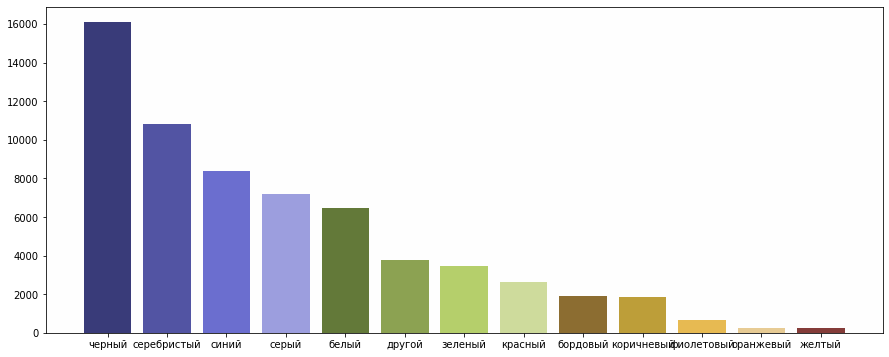

In [131]:
plt.figure(figsize=(20, 15))

color_rectangle = np.random.rand(13, 3)  

fig, ax = plt.subplots()
color_rectangle = np.random.rand(13, 3)   
ax.bar(list(df['Цвет'].value_counts().index), df['Цвет'].value_counts(dropna=False), color = cm.tab20b.colors)

fig.set_figwidth(15)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('1')
ax.set_facecolor('2')

plt.show()

In [133]:
df['Цвет'].value_counts(dropna=False)

черный         16089
другой         11378
серебристый    10839
синий           8404
серый           7213
белый           6473
зеленый         3458
Name: Цвет, dtype: int64

<Figure size 1440x1080 with 0 Axes>

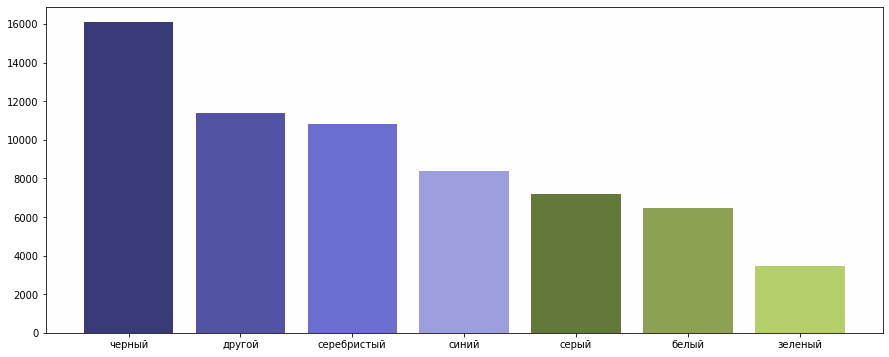

In [134]:
plt.figure(figsize=(20, 15))

color_rectangle = np.random.rand(13, 3)  

fig, ax = plt.subplots()
color_rectangle = np.random.rand(13, 3)   
ax.bar(list(df['Цвет'].value_counts().index), df['Цвет'].value_counts(dropna=False), color = cm.tab20b.colors)

fig.set_figwidth(15)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('1')
ax.set_facecolor('2')

plt.show()

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63854 entries, 0 to 63853
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Название                                             63854 non-null  object 
 1   Цена                                                 63854 non-null  float64
 2   Регион                                               63854 non-null  object 
 3   Год                                                  63854 non-null  int64  
 4   Состояние                                            63854 non-null  object 
 5   Пробег                                               63854 non-null  int64  
 6   Тип топлива                                          63854 non-null  object 
 7   Объем                                                63854 non-null  int64  
 8   Цвет                                                 63854 non-nul

# Analyze other features

In [138]:
df['Регион'].value_counts(dropna=False)

Минск               27093
Гомельская обл.      7200
Брестская обл.       6943
Гродненская обл.     6384
Минская обл.         5664
Могилевская обл.     5288
Витебская обл.       5282
Name: Регион, dtype: int64

In [140]:
df.describe(include='all')

,Название,Цена,Регион,Год,Состояние,Пробег,Тип топлива,Объем,Цвет,Тип кузова,Трансмиссия,Привод,ABS (антиблокировочная система),AUX/iPod,Bluetooth,CD/MP3 проигрыватель,ESP (система поддержания динамической стабильности),USB,Автозапуск двигателя,Антипробуксовочная система,Датчик дождя,Иммобилайзер,Камера заднего вида,Климат-контроль,Кондиционер,Контроль мертвых зон на зеркалах,Круиз-контроль,Ксеноновые фары,Легкосплавные диски,Люк,Материал салона,Мультимедийный экран,Обогрев зеркал,Обогрев лобового стекла,Обогрев руля,Обогрев сидений,Панорамная крыша,Парктроники,Подушки безопасности боковые,Подушки безопасности задние,Подушки безопасности передние,Противотуманные фары,Рейлинги на крыше,Светодиодные фары,Сигнализация,Управление мультимедиа с руля,Фаркоп,Цвет салона - темный,Штатная навигация,Электрорегулировка сидений,Электростеклоподъемники задние,Электростеклоподъемники передние,Материал салона - натуральная кожа
count,63854,63854.000000,63854,63854.000000,63854,6.385400e+04,63854,63854.000000,63854,63854,63854,63854,50301,31099,23312,43333,36179,28920,4601,35054,23747,35569,10956,34191,38339,4840,31763,17528,40312,11862,63854,21388,39713,14943,5401,28859,3664,23431,38536,29479,49424,37378,16680,11549,30320,31474,10334,43244,15744,18833,37897,49132,18190
unique,914,NaN,7,NaN,3,NaN,6,NaN,7,17,2,5,1,5,5,5,1,5,4,1,5,1,5,3,3,6,4,6,8,2,6,5,3,3,1,3,2,7,1,1,1,6,8,6,1,4,8,9,5,4,4,4,1
top,Volkswagen Passat,NaN,Минск,NaN,с пробегом,NaN,бензин,NaN,черный,седан,Механика,Передний,ABS (антиблокировочная система),AUX/iPodКомфорт,Bluetooth,CD/MP3 проигрыватель,ESP (система поддержания динамической стабильн...,USB,Автозапуск двигателяКлимат и обогрев,Антипробуксовочная система,Датчик дождяОптика и свет,Иммобилайзер,Камера заднего вида,Климат-контрольБезопасность,Кондиционер,Контроль мертвых зон на зеркалах,Круиз-контрольКлимат и обогрев,Ксеноновые фарыМультимедиа,Легкосплавные дискиСистемы помощи,ЛюкБезопасность,ткань,Мультимедийный экран,Обогрев зеркал,Обогрев лобового стекла,Обогрев руля,Обогрев сидений,Панорамная крыша,Парктроники,Подушки безопасности боковые,Подушки безопасности задние,Подушки безопасности передние,Противотуманные фарыМультимедиа,Рейлинги на крыше,Светодиодные фары,Сигнализация,Управление мультимедиа с руля,Фаркоп,Цвет салона - темныйЭкстерьер,Штатная навигация,Электрорегулировка сидений,Электростеклоподъемники задние,Электростеклоподъемники передние,Материал салона - натуральная кожа
freq,2543,NaN,27093,NaN,63266,NaN,38417,NaN,16089,21056,35075,41460,50301,29570,20168,29972,36179,28249,4531,35054,22365,35569,8222,21979,24895,4365,27667,16744,27607,10955,25477,20959,38215,14702,5401,28698,2085,18589,38536,29479,49424,20429,13886,9910,30320,25867,8617,31326,15258,17751,32869,42870,18190
mean,NaN,21327.436449,NaN,2005.516084,NaN,2.282004e+05,NaN,2165.968240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,22479.204519,NaN,7.679382,NaN,2.409050e+05,NaN,929.931982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.000000,NaN,1952.000000,NaN,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,8168.000000,NaN,2000.000000,NaN,1.320000e+05,NaN,1600.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,16336.000000,NaN,2006.000000,NaN,2.130000e+05,NaN,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,27227.000000,N

In [141]:
df['Цвет салона - темный'].value_counts(dropna=False)

Цвет салона - темныйЭкстерьер           31326
NaN                                     20610
Цвет салона - темный                     4160
Цвет салона - темныйМультимедиа          2300
Цвет салона - темныйСистемы помощи       2074
Цвет салона - темныйОптика и свет        2045
Цвет салона - темныйКомфорт               614
Цвет салона - темныйКлимат и обогрев      273
Цвет салона - темныйБезопасность          234
Цвет салона - темныйИнтерьер              218
Name: Цвет салона - темный, dtype: int64

In [142]:
df['Привод'].value_counts(dropna=False)

Передний               41460
Постоянный полный       8756
Задний                  7940
Подключаемый полный     4482
0                       1216
Name: Привод, dtype: int64

In [101]:
df['Тип топлива'].value_counts(dropna=False)

бензин                  38417
дизель                  22639
бензин (пропанбутан)     2023
бензин (гибрид)           488
бензин (метан)            225
электро                    62
Name: Тип топлива, dtype: int64

In [102]:
df['ABS (антиблокировочная система)'].value_counts(dropna=False)

ABS (антиблокировочная система)    50301
NaN                                13553
Name: ABS (антиблокировочная система), dtype: int64

In [103]:
df['AUX/iPod'].value_counts(dropna=False)

NaN                         32755
AUX/iPodКомфорт             29570
AUX/iPodКлимат и обогрев      675
AUX/iPodБезопасность          377
AUX/iPodИнтерьер              257
AUX/iPod                      220
Name: AUX/iPod, dtype: int64

In [114]:
df['Тип топлива'].value_counts(dropna=False)

бензин                  38417
дизель                  22639
бензин (пропанбутан)     2023
бензин (гибрид)           488
бензин (метан)            225
электро                    62
Name: Тип топлива, dtype: int64

In [106]:
df['Состояние'].value_counts(dropna=False)

с пробегом         63266
с повреждениями      391
на запчасти          197
Name: Состояние, dtype: int64

In [115]:
df['Штатная навигация'].value_counts(dropna=False)

NaN                                  48110
Штатная навигация                    15258
Штатная навигацияКомфорт               439
Штатная навигацияКлимат и обогрев       26
Штатная навигацияБезопасность           16
Штатная навигацияИнтерьер                5
Name: Штатная навигация, dtype: int64

In [116]:
df['Фаркоп'].value_counts(dropna=False)

NaN                       53520
Фаркоп                     8617
ФаркопМультимедиа           574
ФаркопОптика и свет         550
ФаркопСистемы помощи        316
ФаркопКомфорт               146
ФаркопИнтерьер               45
ФаркопБезопасность           43
ФаркопКлимат и обогрев       43
Name: Фаркоп, dtype: int64

In [117]:
df['Управление мультимедиа с руля'].value_counts(dropna=False)

NaN                                              32380
Управление мультимедиа с руля                    25867
Управление мультимедиа с руляКлимат и обогрев     5410
Управление мультимедиа с руляБезопасность          159
Управление мультимедиа с руляИнтерьер               38
Name: Управление мультимедиа с руля, dtype: int64

In [118]:
df['Рейлинги на крыше'].value_counts(dropna=False)

NaN                                  47174
Рейлинги на крыше                    13886
Рейлинги на крышеСистемы помощи       1045
Рейлинги на крышеОптика и свет         856
Рейлинги на крышеМультимедиа           646
Рейлинги на крышеКомфорт               166
Рейлинги на крышеИнтерьер               36
Рейлинги на крышеКлимат и обогрев       33
Рейлинги на крышеБезопасность           12
Name: Рейлинги на крыше, dtype: int64

In [174]:
df['CD/MP3 проигрыватель'].value_counts(dropna=False)

CD/MP3 проигрыватель                    29972
NaN                                     20521
CD/MP3 проигрывательКомфорт             11954
CD/MP3 проигрывательКлимат и обогрев      736
CD/MP3 проигрывательБезопасность          423
CD/MP3 проигрывательИнтерьер              248
Name: CD/MP3 проигрыватель, dtype: int64

In [119]:
df['Противотуманные фары'].value_counts(dropna=False)

NaN                                     26476
Противотуманные фарыМультимедиа         20429
Противотуманные фары                    14971
Противотуманные фарыКомфорт              1729
Противотуманные фарыКлимат и обогрев      130
Противотуманные фарыИнтерьер               74
Противотуманные фарыБезопасность           45
Name: Противотуманные фары, dtype: int64

In [121]:
df['Материал салона - '].value_counts(dropna=False)

Материал салона - ткань                 25477
Материал салона - натуральная кожа      18190
Материал салона - велюр                 11038
Материал салона - комбинированный        5783
Материал салона - искусственная кожа     2504
Материал салона - алькантара              862
Name: Материал салона - , dtype: int64

In [150]:
df

,Название,Цена,Регион,Год,Состояние,Пробег,Тип топлива,Объем,Цвет,Тип кузова,Трансмиссия,Привод,ABS (антиблокировочная система),AUX/iPod,Bluetooth,CD/MP3 проигрыватель,ESP (система поддержания динамической стабильности),USB,Автозапуск двигателя,Антипробуксовочная система,Датчик дождя,Иммобилайзер,Камера заднего вида,Климат-контроль,Кондиционер,Контроль мертвых зон на зеркалах,Круиз-контроль,Ксеноновые фары,Легкосплавные диски,Люк,Материал салона,Мультимедийный экран,Обогрев зеркал,Обогрев лобового стекла,Обогрев руля,Обогрев сидений,Панорамная крыша,Парктроники,Подушки безопасности боковые,Подушки безопасности задние,Подушки безопасности передние,Противотуманные фары,Рейлинги на крыше,Светодиодные фары,Сигнализация,Управление мультимедиа с руля,Фаркоп,Цвет салона - темный,Штатная навигация,Электрорегулировка сидений,Электростеклоподъемники задние,Электростеклоподъемники передние,Материал салона - натуральная кожа
0,BMW X1,48019.0,Минск,2016,с пробегом,181000,дизель,2000,другой,внедорожник 5 дв,Механика,Передний,ABS (антиблокировочная система),AUX/iPodКомфорт,Bluetooth,CD/MP3 проигрыватель,ESP (система поддержания динамической стабильн...,USB,NaN,Антипробуксовочная система,Датчик дождяОптика и свет,Иммобилайзер,Камера заднего вида,Климат-контрольИнтерьер,Кондиционер,Контроль мертвых зон на зеркалах,Круиз-контрольКлимат и обогрев,NaN,Легкосплавные дискиСистемы помощи,ЛюкБезопасность,натуральная кожа,Мультимедийный экран,Обогрев зеркал,Обогрев лобового стекла,NaN,Обогрев сидений,Панорамная крыша,Парктроники,Подушки безопасности боковые,Подушки безопасности задние,Подушки безопасности передние,Противотуманные фарыМультимедиа,NaN,NaN,Сигнализация,Управление мультимедиа с руля,Фаркоп,NaN,Штатная навигация,Электрорегулировка сидений,Электростеклоподъемники задние,Электростеклоподъемники передние,Материал салона - натуральная кожа
1,Citroen Xantia,4950.0,Гомельская обл.,1998,с пробегом,363400,дизель,2100,другой,хэтчбек 5 дв,Механика,Передний,ABS (антиблокировочная система),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Иммобилайзер,NaN,Климат-контрольБезопасность,NaN,NaN,NaN,NaN,Легкосплавные дискиОптика и свет,NaN,комбинированный,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Подушки безопасности передние,Противотуманные фарыКомфорт,NaN,NaN,NaN,Управление мультимедиа с руляКлимат и обогрев,NaN,Цвет салона - темныйЭкстерьер,NaN,NaN,NaN,Электростеклоподъемники передние,NaN
2,Mercedes-Benz E-Класс,20297.0,Гродненская обл.,2003,с пробегом,307000,дизель,2200,черный,седан,Автомат,Задний,ABS (антиблокировочная система),NaN,NaN,CD/MP3 проигрывательКомфорт,ESP (система поддержания динамической стабильн...,NaN,NaN,Антипробуксовочная система,Датчик дождяОптика и свет,NaN,NaN,Климат-контрольБезопасность,Кондиционер,NaN,Круиз-контрольКлимат и обогрев,Ксеноновые фарыМультимедиа,Легкосплавные дискиСистемы помощи,NaN,комбинированный,NaN,Обогрев зеркал,NaN,NaN,NaN,NaN,NaN,Подушки безопасности боковые,Подушки безопасности задние,Подушки безопасности передние,Противотуманные фары,NaN,NaN,NaN,Управление мультимедиа с руля,NaN,Цвет салона - темныйЭкстерьер,NaN,Электрорегулировка сидений,Электростеклоподъемники задние,Электростеклоподъемники передние,NaN
3,Peugeot 605,1485.0,Минск,1996,с пробегом,107000,дизель,2100,зеленый,седан,Механика,Передний,ABS (антиблокировочная система),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Иммобилайзер,NaN,NaN,КондиционерИнтерьер,NaN,NaN,NaN,NaN,ЛюкБезопасность,натуральная кожа,NaN,Обогрев зеркал,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Подушки безопасности передние,Противотуманные фарыКомфорт,NaN,NaN,Сигнализация,NaN,NaN,Цвет салона - темныйОптика и свет,NaN,NaN,NaN,Электростеклоподъемники передниеКлимат и обогрев,Материал салона - натуральная кожа
4,Volkswagen Passat,9777.0,Гомельская обл.,2000,с пробегом,252475,дизель,1900,черный,универсал,Механика,Передний,ABS (антиблокировочная система),NaN,NaN,NaN,ESP (система поддержания динамической стабильн...,NaN,NaN,Антипробуксовочная система,NaN,Иммобилайзер,NaN,NaN,КондиционерБезопасность,NaN,NaN,NaN,NaN,NaN,ткань,NaN,Обогрев з

In [152]:
# df['drive-unit'].fillna(value=0, inplace=True)

In [166]:
df['ABS (антиблокировочная система)'].value_counts(dropna=False)
df['ABS (антиблокировочная система)'] = df['ABS (антиблокировочная система)'].fillna('0')

{0: '0', 1: 'ABS (антиблокировочная система)'}


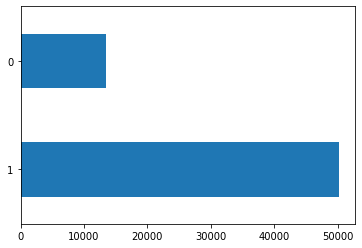

In [171]:
label_encoder = LabelEncoder()

df['ABS (антиблокировочная система)'] = pd.Series(label_encoder.fit_transform(df['ABS (антиблокировочная система)']))
mapped_education.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

In [201]:
df

,Название,Цена,Регион,Год,Состояние,Пробег,Тип топлива,Объем,Цвет,Тип кузова,Трансмиссия,Привод,ABS (антиблокировочная система),AUX/iPod,Bluetooth,CD/MP3 проигрыватель,ESP (система поддержания динамической стабильности),USB,Автозапуск двигателя,Антипробуксовочная система,Датчик дождя,Иммобилайзер,Камера заднего вида,Климат-контроль,Кондиционер,Контроль мертвых зон на зеркалах,Круиз-контроль,Ксеноновые фары,Легкосплавные диски,Люк,Материал салона,Мультимедийный экран,Обогрев зеркал,Обогрев лобового стекла,Обогрев руля,Обогрев сидений,Панорамная крыша,Парктроники,Подушки безопасности боковые,Подушки безопасности задние,Подушки безопасности передние,Противотуманные фары,Рейлинги на крыше,Светодиодные фары,Сигнализация,Управление мультимедиа с руля,Фаркоп,Цвет салона - темный,Штатная навигация,Электрорегулировка сидений,Электростеклоподъемники задние,Электростеклоподъемники передние,Материал салона - натуральная кожа
0,BMW X1,48019.0,Минск,2016,с пробегом,181000,дизель,2000,другой,внедорожник 5 дв,Механика,Передний,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,натуральная кожа,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1
1,Citroen Xantia,4950.0,Гомельская обл.,1998,с пробегом,363400,дизель,2100,другой,хэтчбек 5 дв,Механика,Передний,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,комбинированный,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0
2,Mercedes-Benz E-Класс,20297.0,Гродненская обл.,2003,с пробегом,307000,дизель,2200,черный,седан,Автомат,Задний,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,1,1,0,комбинированный,0,1,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,1,1,1,0
3,Peugeot 605,1485.0,Минск,1996,с пробегом,107000,дизель,2100,зеленый,седан,Механика,Передний,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,натуральная кожа,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1
4,Volkswagen Passat,9777.0,Гомельская обл.,2000,с пробегом,252475,дизель,1900,черный,универсал,Механика,Передний,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,ткань,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63849,Audi A6,12376.0,Гродненская обл.,2001,с пробегом,345000,дизель,2500,зеленый,универсал,Автомат,Постоянный полный,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,натуральная кожа,0,1,0,0,0,0,0,1,1,1,1,1,0,1,0,1,0,0,0,0,0,1
63850,Fiat 500,20297.0,Брестская обл.,2012,с пробегом,79000,бензин,900,белый,хэтчбек 3 дв,Механика,Передний,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,1,1,0,ткань,0,1,0,0,0,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0
63851,Nissan Primera,10520.0,Минск,2004,с пробегом,273538,бензин,1800,серый,седан,Механика,Передний,1,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,0,велюр,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0
63852,BMW 3,17324.0,Минск,2002,с пробегом,317,бензин,2500,серый,кабриолет,Автомат,Задний,1,0,1,0,1,0,0,1,0,0,0,1,1,0,1,1,1,0,натуральная кожа,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,1,1,1,1


In [179]:
type(df['Цена'][1])

numpy.float64